### 1) Valeurs manquantes
Epochs 5

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.3417 - val_loss: 0.1660
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1587 - val_loss: 0.1408
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1394 - val_loss: 0.1310
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1301 - val_loss: 0.1246
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1243 - val_loss: 0.1211
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


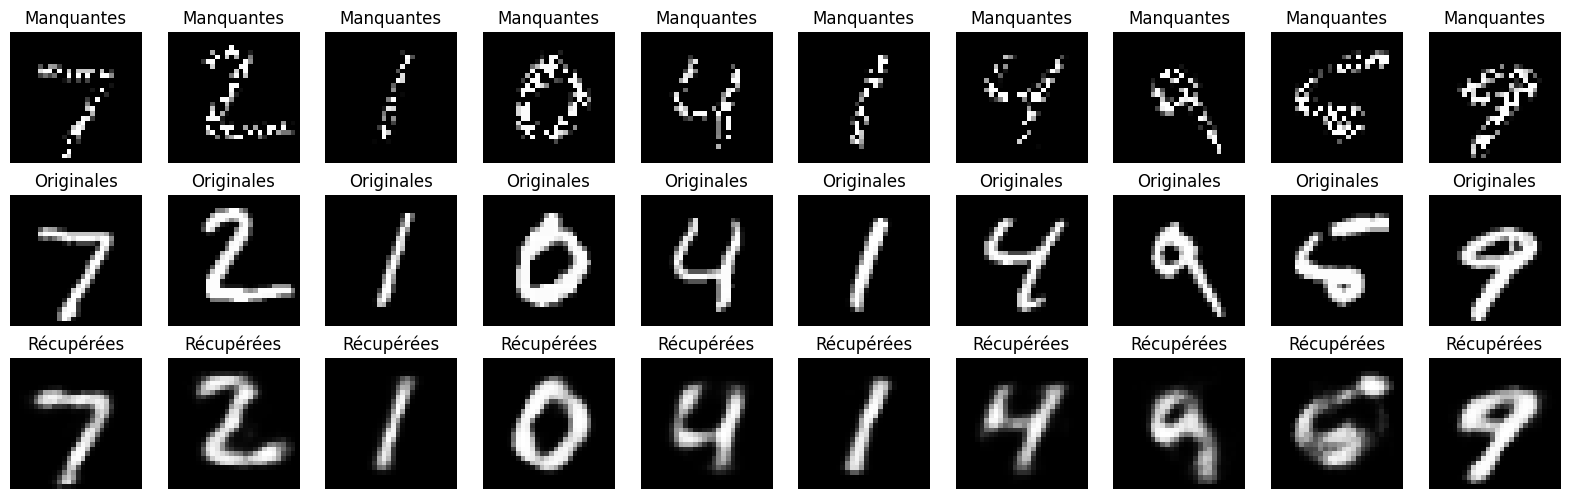

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Charger le dataset MNIST
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Masquer aléatoirement 50% des pixels pour simuler des données manquantes
def add_missing_data(x, missing_fraction=0.5):
    mask = np.random.rand(*x.shape) > missing_fraction
    x_missing = x * mask
    return x_missing, mask

x_train_missing, train_mask = add_missing_data(x_train)
x_test_missing, test_mask = add_missing_data(x_test)

# Construction de l'autoencodeur
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
encoded = Dense(64, activation='relu')(x)

x = Dense(128, activation='relu')(encoded)
x = Dense(28*28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Entraînement de l'autoencodeur - à vous de spécifier la valeur de 'epochs'
autoencoder.fit(x_train_missing, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_missing, x_test))

# Compléter les données manquantes
recovered_imgs = autoencoder.predict(x_test_missing)

# Affichage des résultats
n = 10  # nombre d'images à afficher
plt.figure(figsize=(20, 6))
for i in range(n):
    # Images avec données manquantes
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_missing[i].reshape(28, 28), cmap='gray')
    plt.title("Manquantes")
    plt.axis('off')

    # Images originales
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Originales")
    plt.axis('off')

    # Images récupérées
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(recovered_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Récupérées")
    plt.axis('off')
plt.show()


Epochs 10

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.3406 - val_loss: 0.1638
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1573 - val_loss: 0.1402
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.1388 - val_loss: 0.1305
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1300 - val_loss: 0.1246
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1241 - val_loss: 0.1207
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1205 - val_loss: 0.1180
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.1177 - val_loss: 0.1160
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1156 - val_loss: 0.1141
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.1138 - val_loss: 0.1126
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1121 - val_loss: 0.1115
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


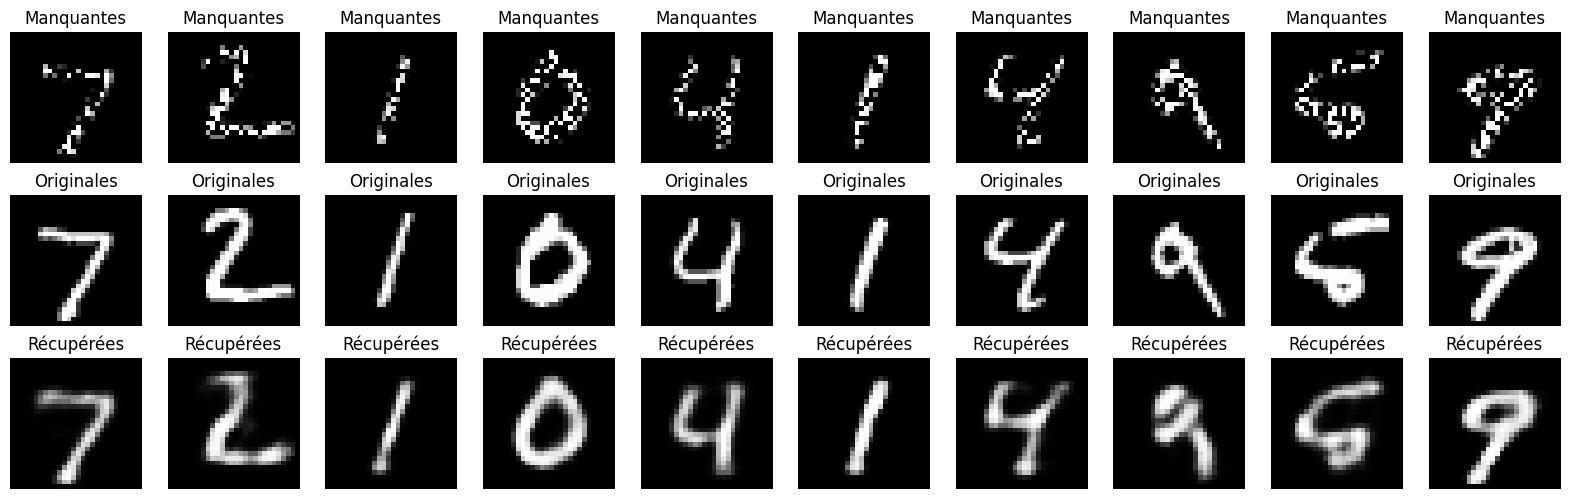

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Charger le dataset MNIST
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Masquer aléatoirement 50% des pixels pour simuler des données manquantes
def add_missing_data(x, missing_fraction=0.5):
    mask = np.random.rand(*x.shape) > missing_fraction
    x_missing = x * mask
    return x_missing, mask

x_train_missing, train_mask = add_missing_data(x_train)
x_test_missing, test_mask = add_missing_data(x_test)

# Construction de l'autoencodeur
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
encoded = Dense(64, activation='relu')(x)

x = Dense(128, activation='relu')(encoded)
x = Dense(28*28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Entraînement de l'autoencodeur - à vous de spécifier la valeur de 'epochs'
autoencoder.fit(x_train_missing, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_missing, x_test))

# Compléter les données manquantes
recovered_imgs = autoencoder.predict(x_test_missing)

# Affichage des résultats
n = 10  # nombre d'images à afficher
plt.figure(figsize=(20, 6))
for i in range(n):
    # Images avec données manquantes
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_missing[i].reshape(28, 28), cmap='gray')
    plt.title("Manquantes")
    plt.axis('off')

    # Images originales
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Originales")
    plt.axis('off')

    # Images récupérées
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(recovered_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Récupérées")
    plt.axis('off')
plt.show()


Epochs 20

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.3412 - val_loss: 0.1667
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1586 - val_loss: 0.1404
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1383 - val_loss: 0.1307
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1297 - val_loss: 0.1250
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1247 - val_loss: 0.1213
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1209 - val_loss: 0.1185
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1184 - val_loss: 0.1163
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1158 - val_loss: 0.1143
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1137 - val_loss: 0.1124
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1119 - val_loss: 0.1112
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1105 - val_loss: 0.1099
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

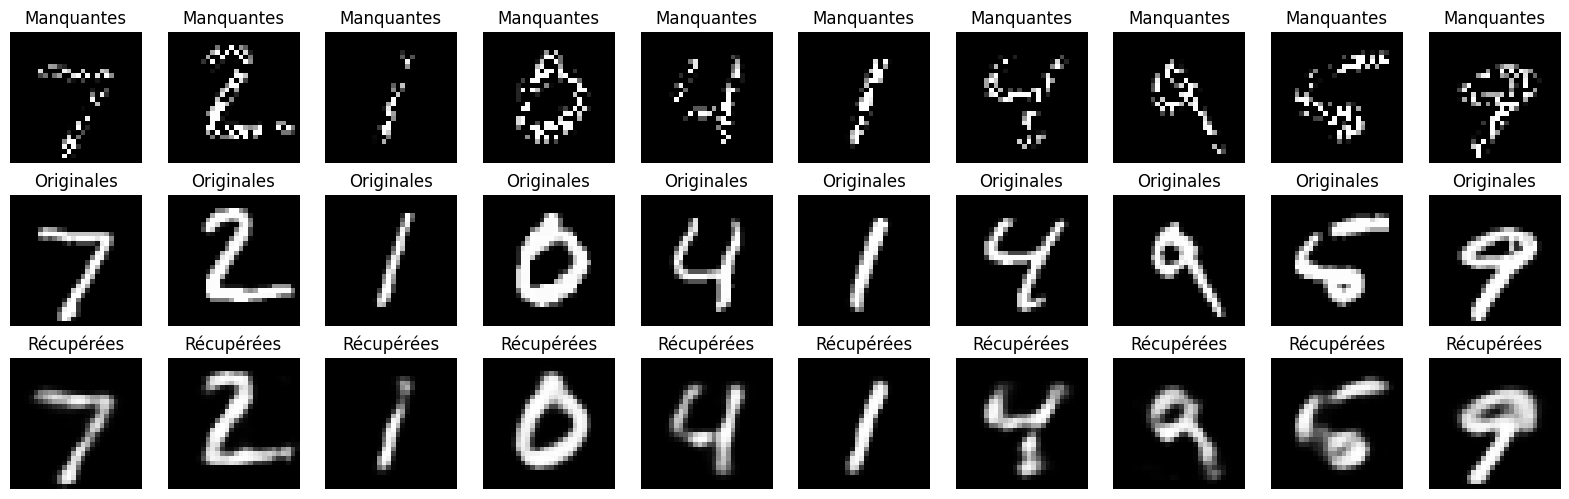

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Charger le dataset MNIST
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Masquer aléatoirement 50% des pixels pour simuler des données manquantes
def add_missing_data(x, missing_fraction=0.5):
    mask = np.random.rand(*x.shape) > missing_fraction
    x_missing = x * mask
    return x_missing, mask

x_train_missing, train_mask = add_missing_data(x_train)
x_test_missing, test_mask = add_missing_data(x_test)

# Construction de l'autoencodeur
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
encoded = Dense(64, activation='relu')(x)

x = Dense(128, activation='relu')(encoded)
x = Dense(28*28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Entraînement de l'autoencodeur - à vous de spécifier la valeur de 'epochs'
autoencoder.fit(x_train_missing, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_missing, x_test))

# Compléter les données manquantes
recovered_imgs = autoencoder.predict(x_test_missing)

# Affichage des résultats
n = 10  # nombre d'images à afficher
plt.figure(figsize=(20, 6))
for i in range(n):
    # Images avec données manquantes
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_missing[i].reshape(28, 28), cmap='gray')
    plt.title("Manquantes")
    plt.axis('off')

    # Images originales
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Originales")
    plt.axis('off')

    # Images récupérées
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(recovered_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Récupérées")
    plt.axis('off')
plt.show()


Epochs 30

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.3510 - val_loss: 0.1725
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1633 - val_loss: 0.1420
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1403 - val_loss: 0.1319
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1312 - val_loss: 0.1264
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1256 - val_loss: 0.1223
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1221 - val_loss: 0.1193
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1188 - val_loss: 0.1167
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1165 - val_loss: 0.1149
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1143 - val_loss: 0.1133
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1126 - val_loss: 0.1118
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1117 - val_loss: 0.1109
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 

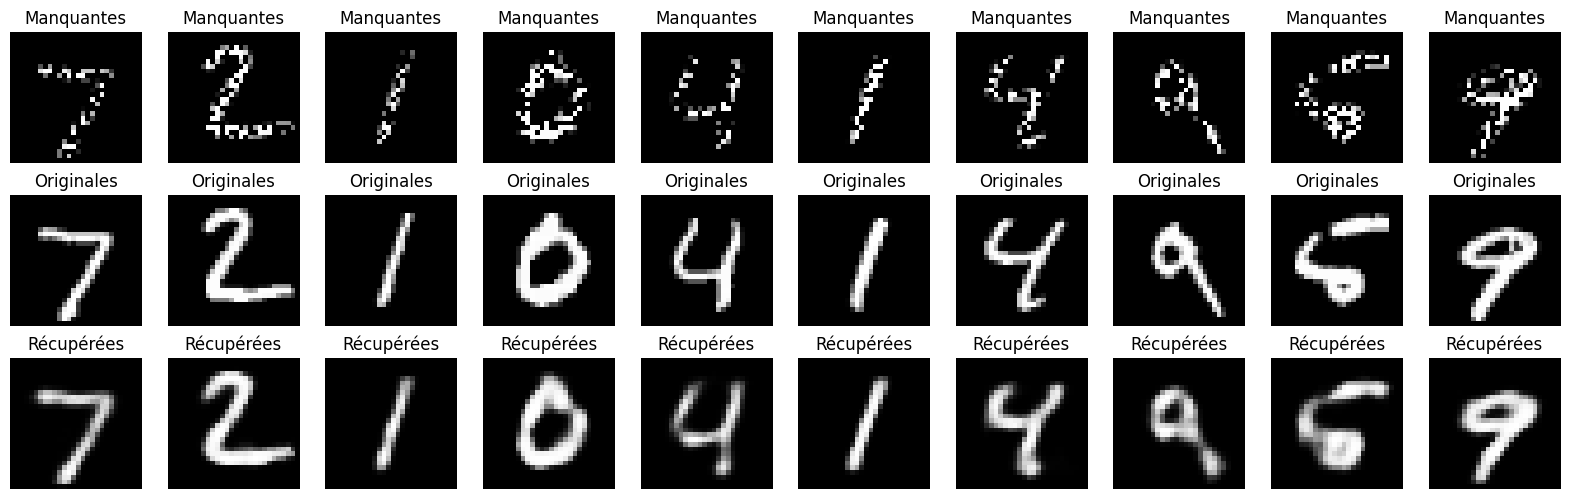

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Charger le dataset MNIST
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Masquer aléatoirement 50% des pixels pour simuler des données manquantes
def add_missing_data(x, missing_fraction=0.5):
    mask = np.random.rand(*x.shape) > missing_fraction
    x_missing = x * mask
    return x_missing, mask

x_train_missing, train_mask = add_missing_data(x_train)
x_test_missing, test_mask = add_missing_data(x_test)

# Construction de l'autoencodeur
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
encoded = Dense(64, activation='relu')(x)

x = Dense(128, activation='relu')(encoded)
x = Dense(28*28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Entraînement de l'autoencodeur - à vous de spécifier la valeur de 'epochs'
autoencoder.fit(x_train_missing, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_missing, x_test))

# Compléter les données manquantes
recovered_imgs = autoencoder.predict(x_test_missing)

# Affichage des résultats
n = 10  # nombre d'images à afficher
plt.figure(figsize=(20, 6))
for i in range(n):
    # Images avec données manquantes
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_missing[i].reshape(28, 28), cmap='gray')
    plt.title("Manquantes")
    plt.axis('off')

    # Images originales
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Originales")
    plt.axis('off')

    # Images récupérées
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(recovered_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Récupérées")
    plt.axis('off')
plt.show()


### 1) Temps d'éxecution

- 5 époques : 34 secondes
- 10 époques : 50 secondes
- 20 époques :  1 minute
- 30 époques : 2 minutes.

### Commentaire
  - D'aprés les visualisations des résultats pour chaque époque on constate que plus l'époque est élévée plus l'image prédit est nette.
  - on constate que le temps d'apprentissage de l'Autoencodeur augmente propotionnellement par rapport au nombre d'époque.